<h2>Lab 6</h2>

Max Wang<br>
Phys 434

In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import h5py
import pandas as pd
plt.rcParams["figure.figsize"] = (10,8)

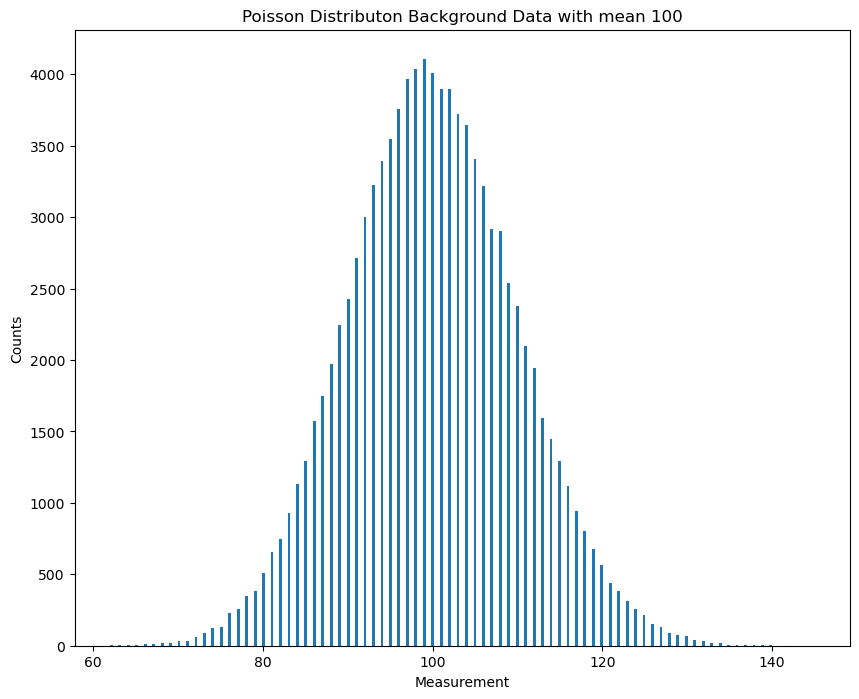

In [40]:
#Make a Poisson background with a mean of 100
bkgd = stats.poisson.rvs(100, size = 100000)
plt.hist(bkgd,bins=250)

plt.title("Poisson Distributon Background Data with mean 100")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.show()

The background data is generated with 100,000 random poisson distributed<br>
numbers using the stats.poisson.rvs function. 

<h4>Problem 1</h4>

In [31]:
stats.poisson(100).ppf(stats.norm.cdf(5))

154.0

The 5 sigma sensitivity threshold for the background distribution<br>
is 154.

<h4>Problem 2</h4>

<h4>2a.</h4>

Probability for 8 sigma (signal value)

In [32]:
pro_8_sig = stats.norm.sf(8)
pro_8_sig

6.22096057427174e-16

Threshold for 8 sigma with Poisson distribution

In [33]:
th_8_sig = stats.poisson.isf(pro_8_sig, mu = 100)
th_8_sig

190.0

In [47]:
signal = stats.poisson.rvs(250,size=100000)

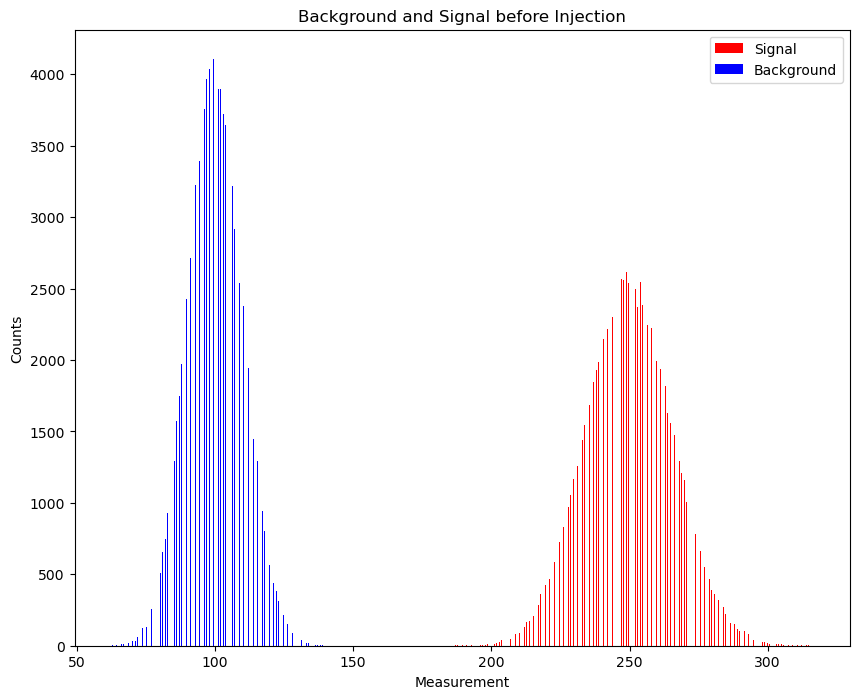

In [48]:
plt.hist([signal, bkgd], bins = 400, color=['red','blue'],label=['Signal', 'Background'])
plt.title("Background and Signal before Injection")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

The histogram maintains the shape of a poisson distribution,<br>
and this is expected as the shape of the distribution should <br>
stay the same as the background, but all the values is shifted to<br>
the right by 190. The new mean of the distribution is centered <br>
around the 290 mark, which is 190 higher than the original distribution<br>
mean of 100. 

<h4>2b.</h4>

In [51]:
signal2 = signal + 150

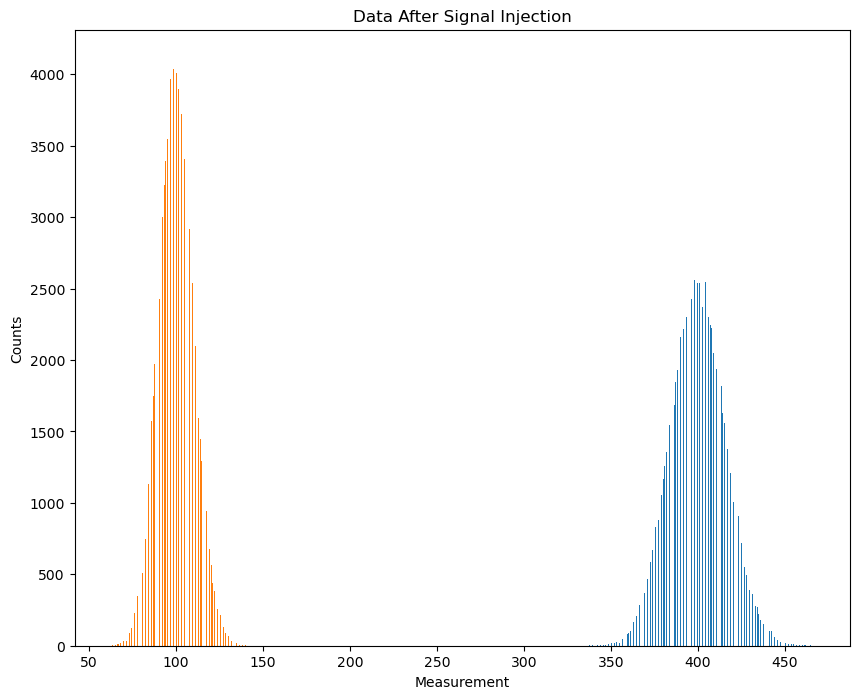

In [52]:
plt.hist([signal2,bkgd],bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

After the signal injection of 150, the mean has change from 250 to 400, meaning that <br>
the observed signal is biased in a way that all of it is shifted 150 over the original <br>
data. In fact, not only the mean is shifted, the entire signal is shifted and is biased by <br>
150. The shape is retained as the distribution is still poisson, and the observed measurement <br>
is the combination of both the signal and the injected signal. And although it is a poisson <br>
distribution, since the sample size is 100,000, due to the central limit theorem, the distribution<br>
appears symmetric and Gaussian. 

<h4>Problem 3</h4>

<h4>3a.</h4>

The suite of injected signals is created by the np.linspace, and the signal <br>
strength is starting at zero to 501, and then a 2d array is created by <br>
adding the two 1d array and storing the new 2d array in data, which is then <br>
plotted.

In [60]:
bkgd2 = stats.poisson.rvs(mu=100, size=100000)
injection = np.linspace(0,501,100000)

data = bkgd2 + injection

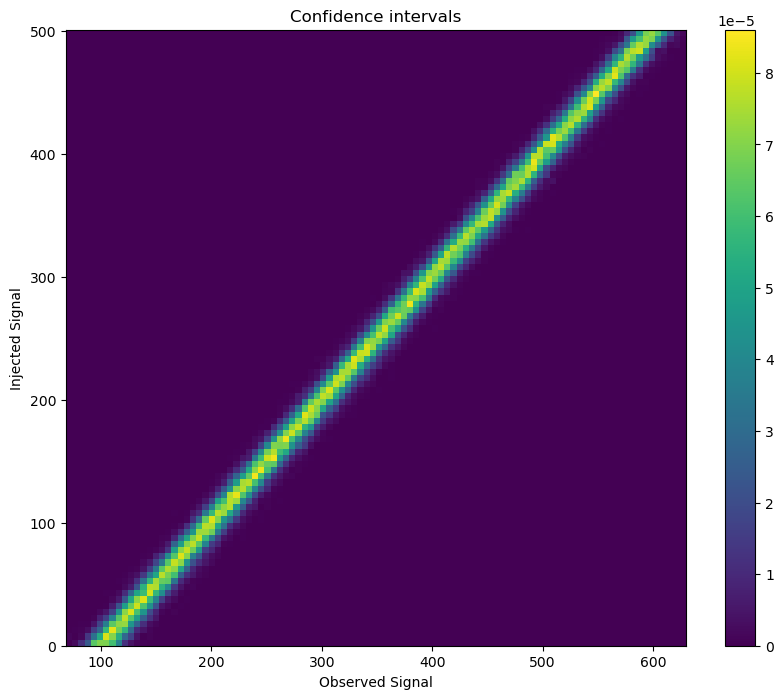

In [61]:
h = plt.hist2d(data, injection, bins = (100,100), density=True)
plt.colorbar(h[3])

plt.title("Confidence intervals")
plt.xlabel("Observed Signal")
plt.ylabel("Injected Signal")
plt.show()

<h4>3b.</h4>

In [65]:
samplebkgd = stats.poisson.rvs(100, size = 10000)
new_signal = samplebkgd + 150

The sample background is created again, with the mean being 100, and this time <br>
a smaller size of 10000, and the new signal is created with the background plus <br>
the injected signal of 150, and it is added many times to the background, the histogram <br>
of the result is plotted below.

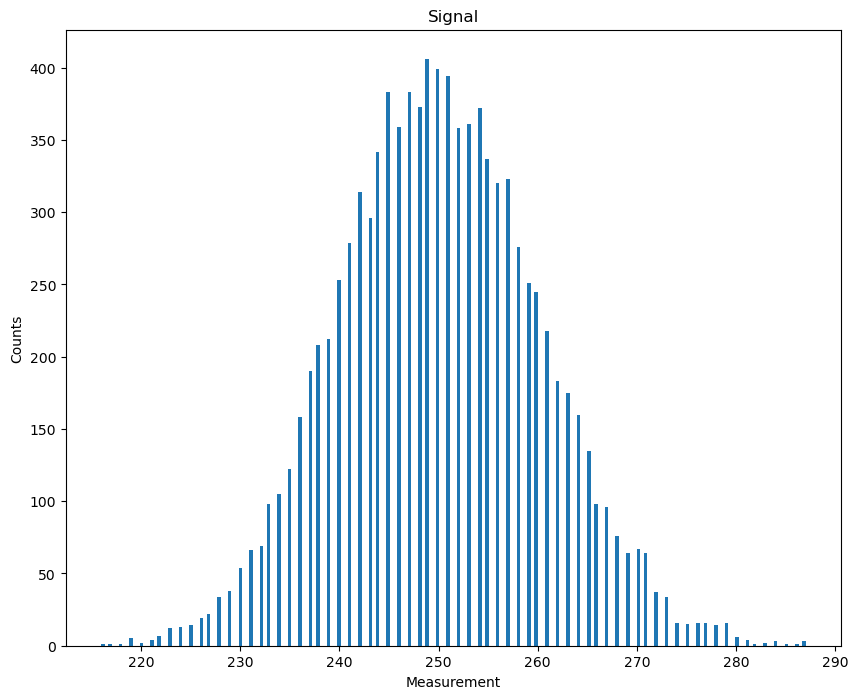

In [66]:
plt.hist(new_signal, bins = 200)
plt.title('Signal')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

When compared to the signal power in problem two, we see a similar poisson distribution <br>
with the mean around 250, which is the same as the earlier distribution. 

<h4>3c.</h4>

In [74]:
new_mean = 350
bkgd_mean = 100
new_sample = stats.poisson.rvs(new_mean, size=10000)

new_sample2 = new_sample - bkgd_mean

A new mean of 350 is decided for the reversal to find the original injected signal from the observed data. <br>


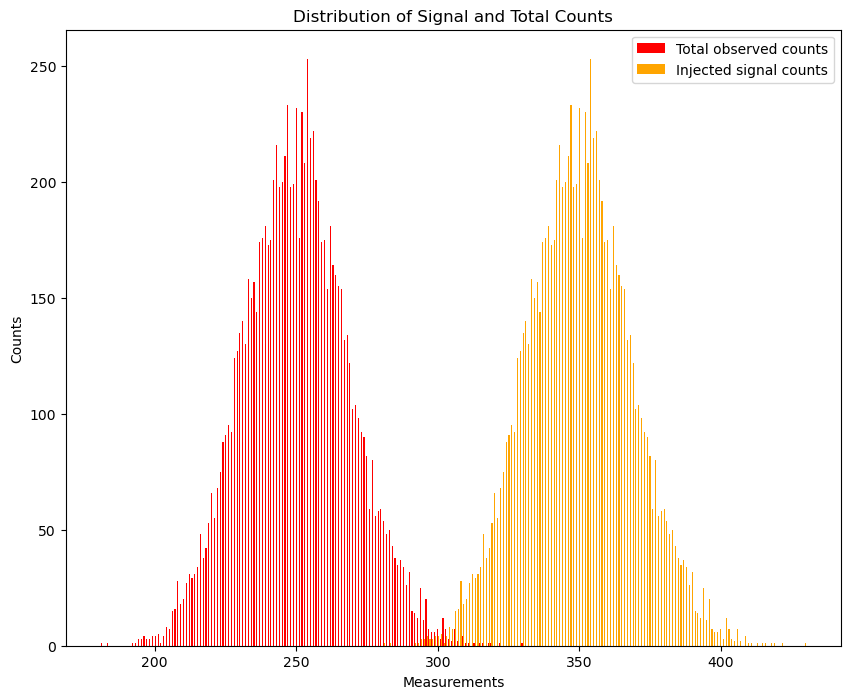

In [76]:
plt.hist([new_sample2, new_sample], bins = 250, color=['red', 'orange'], label=['Total observed counts', 'Injected signal counts'])
plt.title('Distribution of Signal and Total Counts')
plt.xlabel('Measurements')
plt.ylabel('Counts')
plt.legend()
plt.show()

The two distributions are very similar, even though the injected signal is independent from<br>
the background data, and it is created by subtracting the signal data with the injected data. 

<h4>3d.</h4>

From the observed signal, we can see that the mean is at 250, and the 1 sigma uncertainty <br>
is about 50 from the mean as the observed signal is about one sigma away from the true <br>
signal strength.

<h4>3e</h4>

The true distribution is symmetric because since it is Poisson distribution, we are able to prove that <br>
the signal is the same as previous parts in problem 2, as the distribution and the mean are both the same. <br>
It also follows the Central Limit theorem in that the distribution approaches normal as the sample size<br>
gets bigger. It is biased since the observed signal is shifted away from the true signal, but it maintains <br>
the same shape because the injected signal is added many times, which makes the overall distribution <br>
the same as prior the injection. 